#Zooming

(8000, 1, 21, 21) (8000, 41, 41)


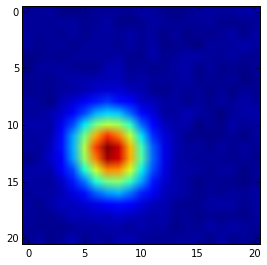

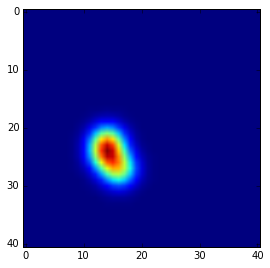

In [1]:
from tool_image import gaussian
Ddelta = []
fail = 0
N=10000
nd=10
depth=1
Nmax=10
Image , Pos =[],[]
for i in range(N):
    test = np.zeros((depth,2*nd+1,2*nd+1))
    out = np.zeros(( 2*(2*nd+1)-1,2*(2*nd+1)-1))
    
    #pos = np.zeros((Nmax,2))
    pos = []
    nr = np.random.randint(1,Nmax)            

    for i in range(nr):
        cx,cy = np.random.rand(2)
        rescale = lambda x: 5*(1-2*x)
        cx = rescale(cx)
        cy= rescale(cy)
        intensity = np.random.randint(500,10000)
        intensity=10000
        #print nr
        for d in range(depth):
            test[d] +=gaussian(intensity,nd+cx,nd+cy,2,2)(*indices((2*nd+1,2*nd+1))) + \
                        500*np.random.rand(2*nd+1,2*nd+1)
            out += gaussian(intensity,2*(nd+cx),2*(nd+cy),2,2)(*indices((2*(2*nd+1)-1,2*(2*nd+1)-1))) 
        
        #pos.append(out)
        #pos[nr,0] = cx
        #pos[nr,1] = cy
    
    Image.append(test/nr)
    Pos.append(out/nr)
    #print test.shape

Image = np.array(Image)
Pos = np.array(Pos)
train = int(0.8*N)
X_train,y_train=Image[:train],Pos[:train]
X_test,y_test=Image[train:],Pos[train:]
print X_train.shape , y_train.shape
imshow(X_train[0,0])
figure()
imshow(y_train[0])


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

d = 2*nd+1
nfilter=10
model = Sequential()
model.add(Convolution2D(nfilter, depth, d, d, border_mode='full')) 
print nfilter, depth, d, d
model.add(Activation('relu'))
model.add(Convolution2D(nfilter/2, nfilter, d, d))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(1, nfilter/2, d, d, border_mode='full')) 


#model.add(Dense(2*2*nfilter*(d-1)/2*(d-1)/2, 4*d**2))
#print 2*2*nfilter*(d-1)/2*(d-1)/2,4*d**2, 4*d**2
#model.add(Activation('linear'))
model.add(Reshape(2*d-1,2*d-1))
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer="rmsprop")#optimizer=sgd)

10 1 21 21


Using gpu device 0: GeForce GTX 660


In [9]:
for i in range(10):
    model.fit(X_train, y_train, batch_size=40, nb_epoch=10, validation_split=0.05,verbose=1)
    model.save_weights("increase_resolution_%i"%(i+30))

Train on 7600 samples, validate on 400 samples
Epoch 0
7600/7600 [==============================] - 31s - loss: 16146.7786 - val_loss: 12112.6866
Epoch 1
7600/7600 [==============================] - 31s - loss: 16140.0635 - val_loss: 10076.4986
Epoch 2
7600/7600 [==============================] - 31s - loss: 16074.4126 - val_loss: 11429.1454
Epoch 3
7600/7600 [==============================] - 32s - loss: 16019.7297 - val_loss: 14889.4283
Epoch 4
7600/7600 [==============================] - 32s - loss: 15985.9033 - val_loss: 11945.9311
Epoch 5
7600/7600 [==============================] - 32s - loss: 15885.6089 - val_loss: 14585.8410
Epoch 6
7600/7600 [==============================] - 32s - loss: 15947.5158 - val_loss: 14023.0199
Epoch 7
7600/7600 [==============================] - 32s - loss: 15987.9135 - val_loss: 12460.9066
Epoch 8
7600/7600 [==============================] - 31s - loss: 15802.1833 - val_loss: 13615.7692
Epoch 9
7600/7600 [==============================] - 32s - los

In [3]:
#model.save_weights("Zoom", overwrite=True)
#model.load_weights("Zoom")

In [19]:
from treat3b import load_data_3b,get_interesting
D= load_data_3b()
W = get_interesting(D)
print W.shape,X_test.shape

(300, 21, 21) (2000, 1, 21, 21)


In [10]:
predicted = model.predict(X_test)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
print rmse

[[ 2.66737103  2.70285837  2.6907141  ...,  2.78462726  2.76435507
   2.75449133]
 [ 2.6840788   2.82568457  2.8735288  ...,  2.91047343  2.81864961
   2.75449133]
 [ 2.71046109  2.93166459  3.03720418 ...,  3.06039139  2.920733
   2.76028113]
 ..., 
 [ 2.82444212  2.95709535  3.24739729 ...,  3.7379626   3.30388909
   2.8638827 ]
 [ 2.76763714  2.81806302  2.93271078 ...,  3.1828479   2.97680134
   2.7674386 ]
 [ 2.75155178  2.7523277   2.75653661 ...,  2.63038894  2.66591558
   2.67737446]]


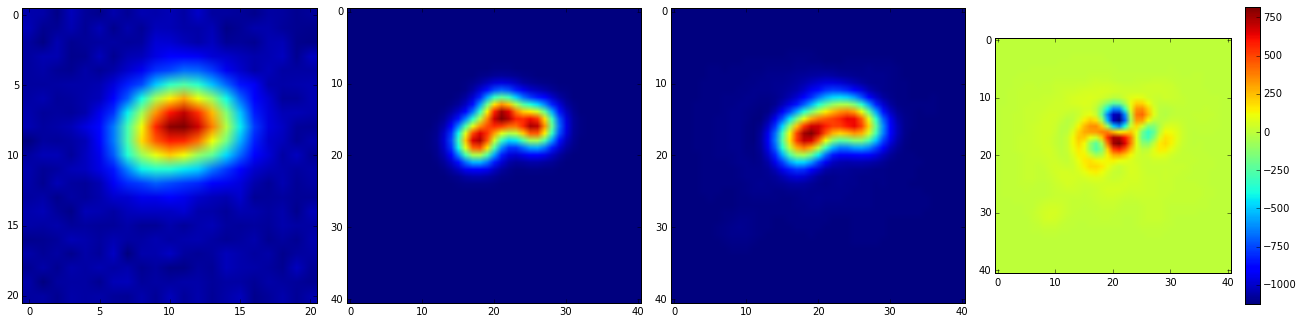

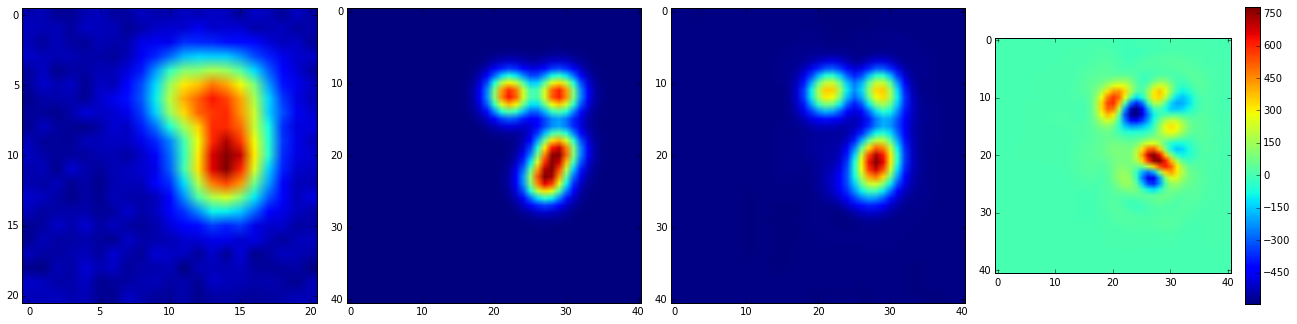

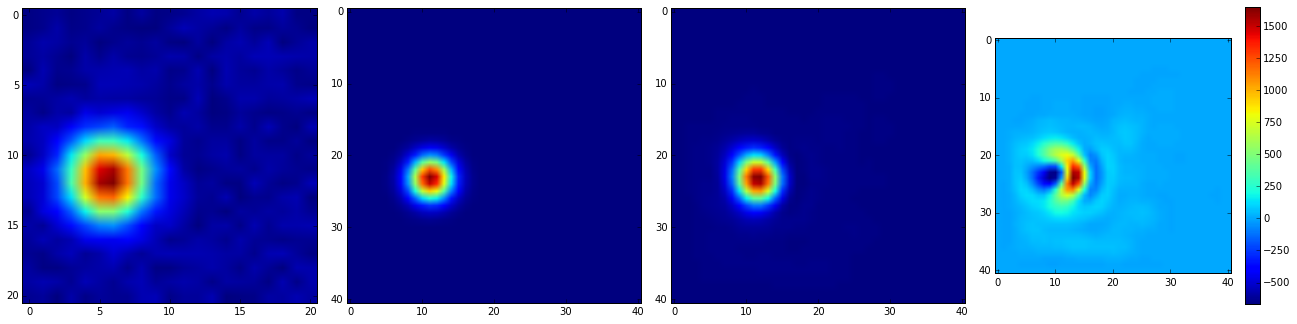

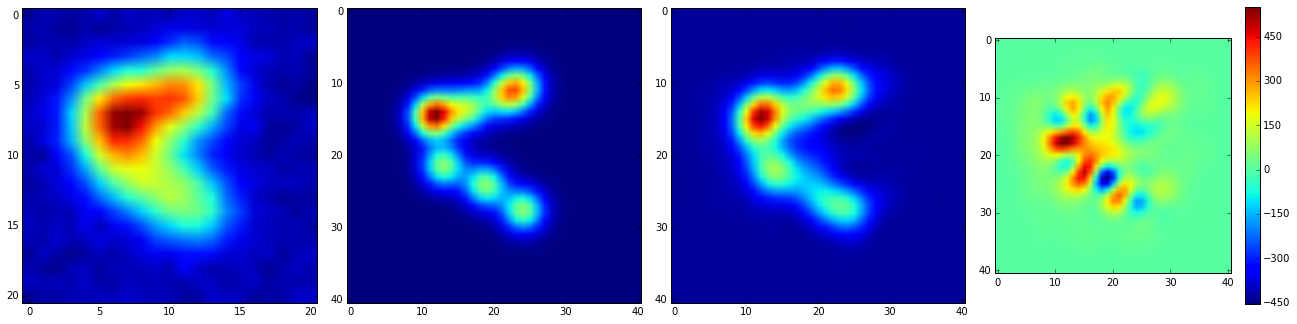

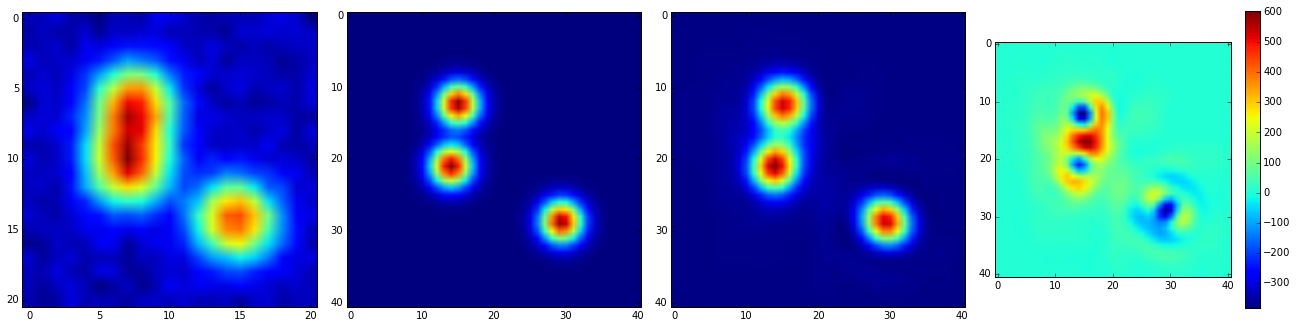

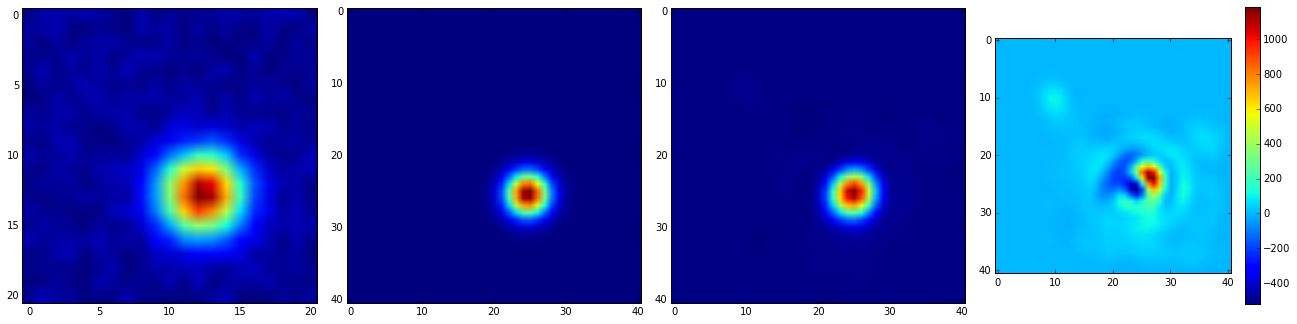

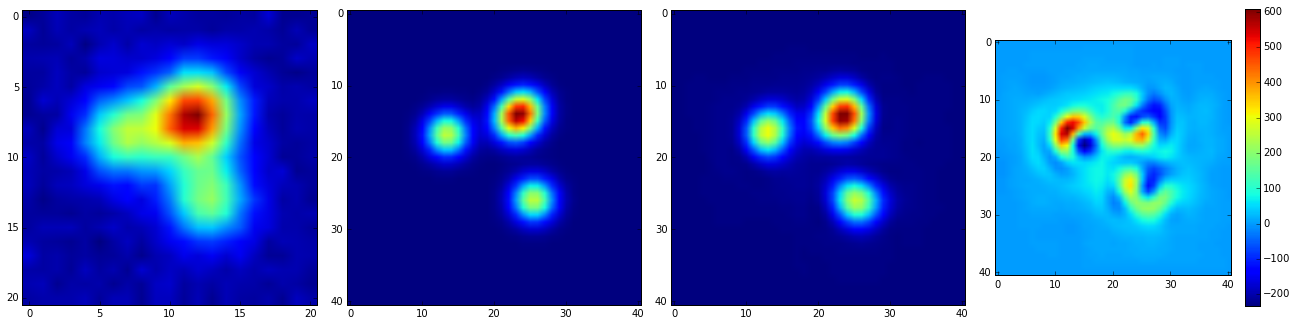

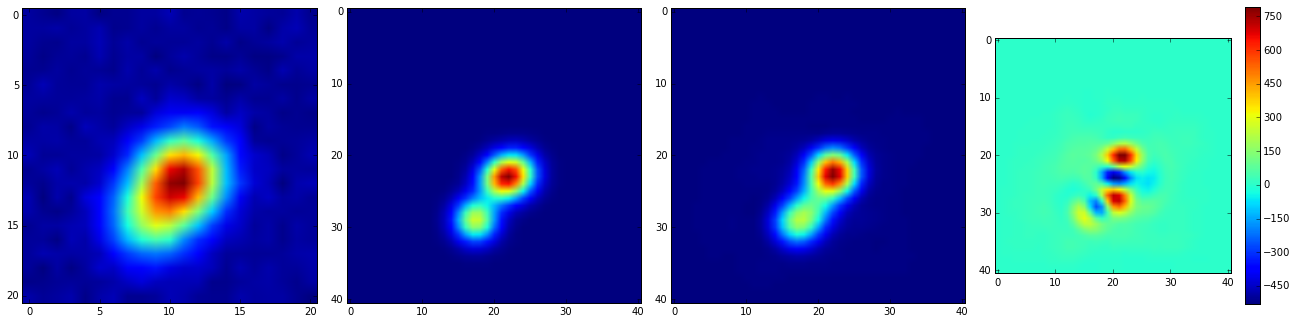

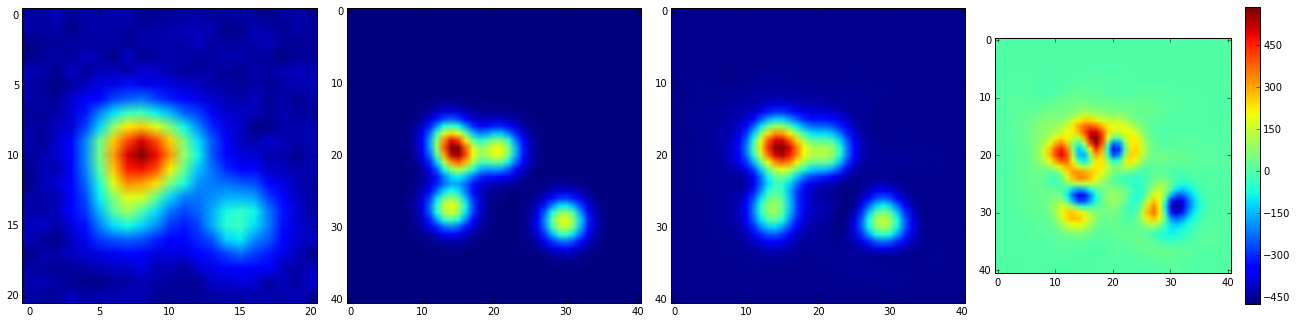

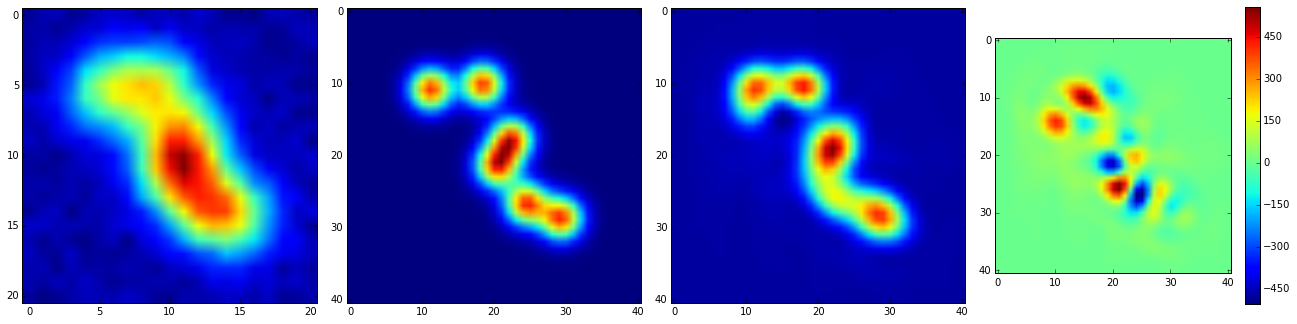

In [11]:
for i in range(10):
    f =figure(figsize(20,5))
    ax = f.add_subplot(1,4,1)
    imshow(X_test[i,0])
    ax = f.add_subplot(1,4,2)
    imshow(y_test[i])
    ax = f.add_subplot(1,4,3)
    imshow(predicted[i])
    ax = f.add_subplot(1,4,4)
    imshow(predicted[i]-y_test[i])
    colorbar()

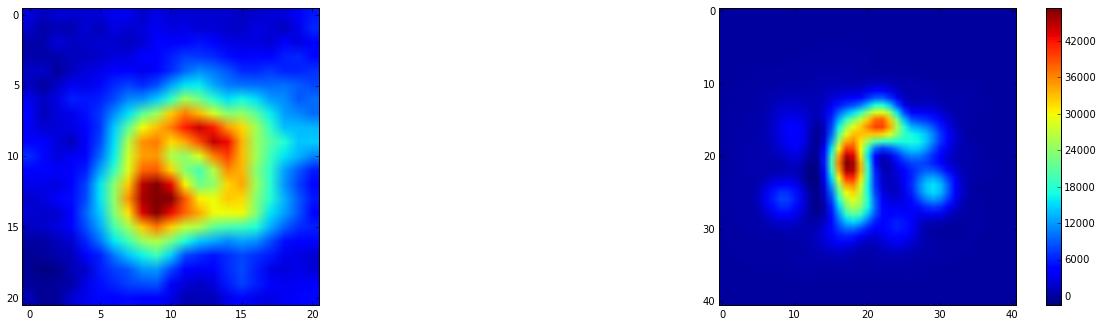

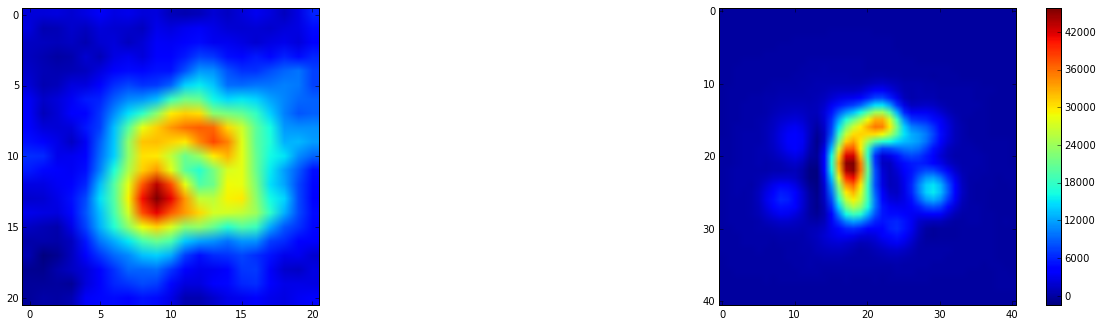

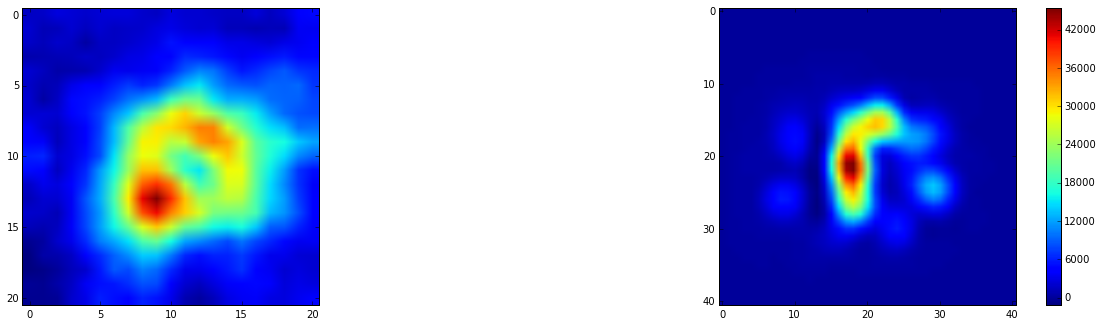

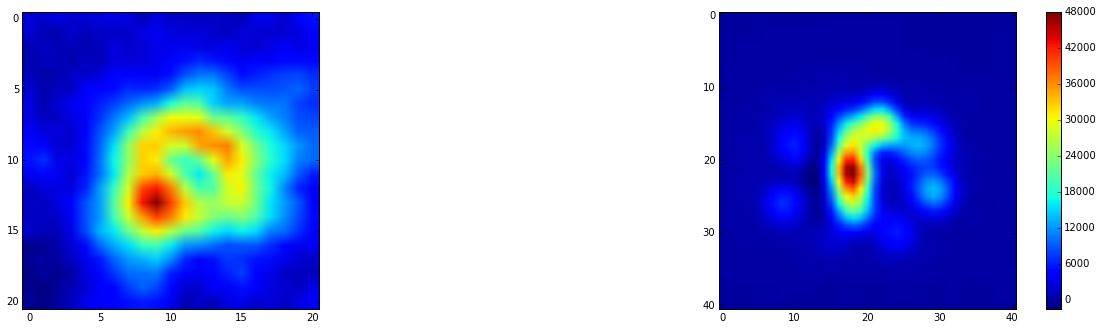

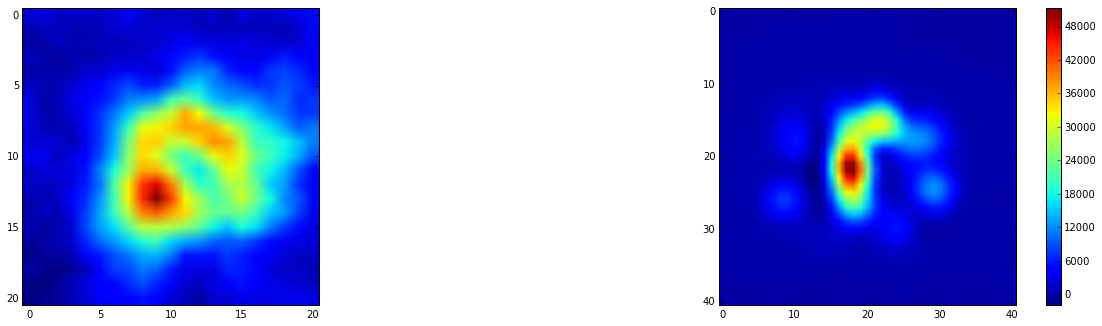

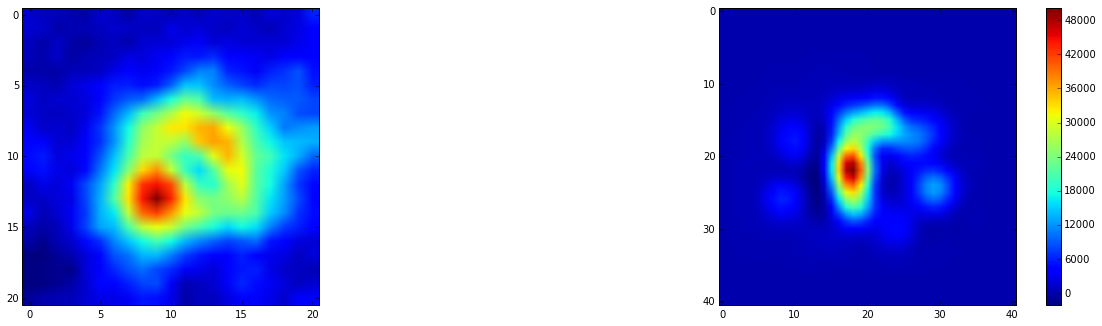

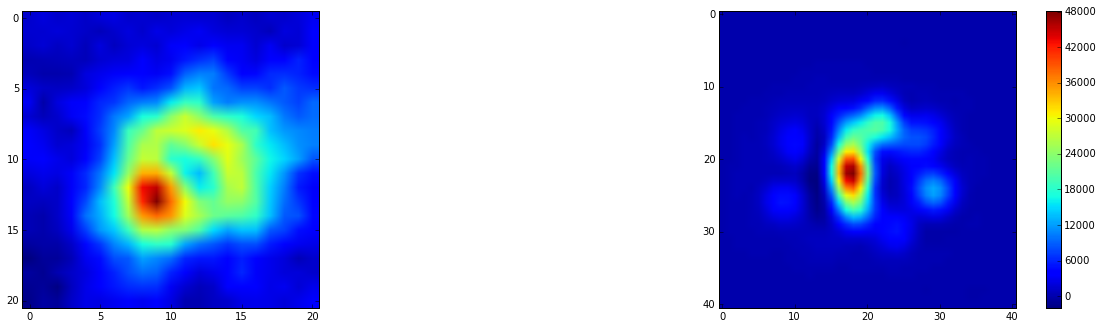

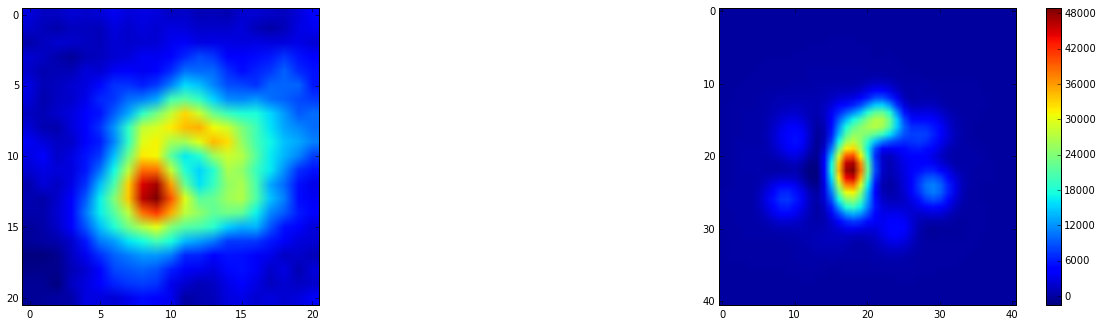

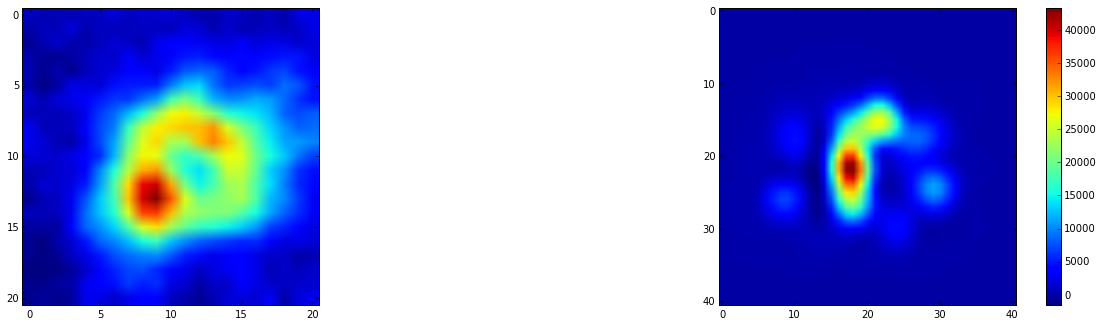

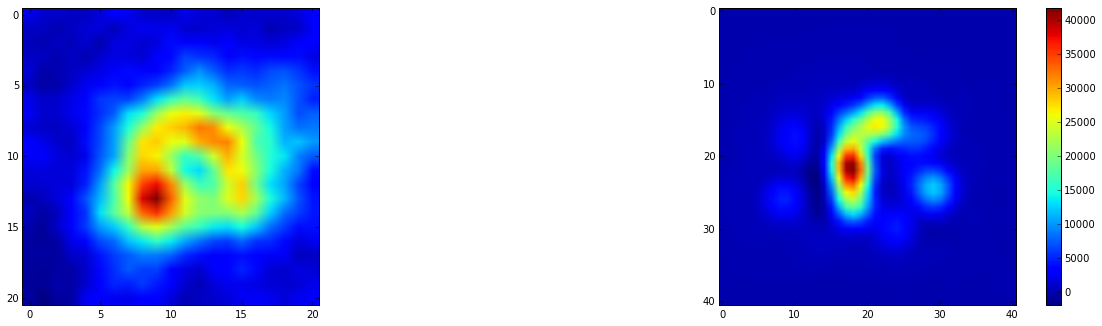

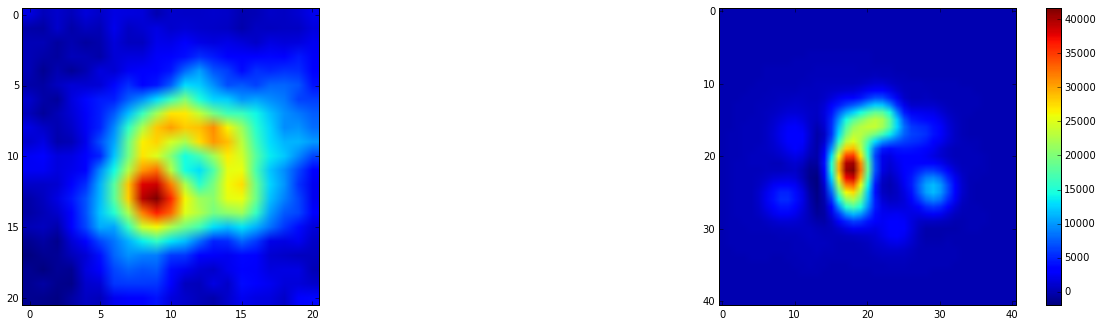

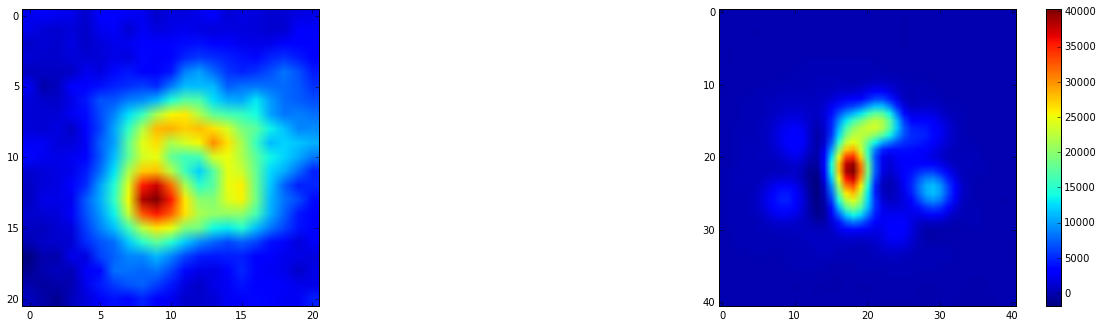

In [36]:
from theano.tensor import matrix,vector,tensor3
from theano import function
x = tensor3("x")
y = tensor3("y")
y = x
f = function([x],y,allow_input_downcast=True)
y= f(W)
#print y
#print y.dimshuffle(0,"x",1,2)
#print X_test.shape
predicted = model.predict(W[::,newaxis,::,::])
inc=20
for i in range(0,300,inc):
    f =figure(figsize(20,5))
    ax = f.add_subplot(1,2,1)
    imshow(W[i/inc])

    ax = f.add_subplot(1,2,2)
    imshow(predicted[i/inc])

    colorbar()

# Temporal

In [77]:
from tool_image import gaussian
Ddelta = []
fail = 0
N=5000
nd=2
depth=50
Nmax=10
Image , Pos =[],[]
for i in range(N):
    test = np.zeros((depth,2*nd+1,2*nd+1))
    #test = test.reshape((depth,-1))
    #print test.shape
    out = np.zeros(( 2*(2*nd+1)-1,2*(2*nd+1)-1))
    
    #pos = np.zeros((Nmax,2))
    pos = []
    nr = np.random.randint(1,Nmax)            

    for i in range(nr):
        cx,cy = np.random.rand(2)
        rescale = lambda x: 5*(1-2*x)
        cx = rescale(cx)
        cy= rescale(cy)
        intensity = np.random.randint(500,10000)
        intensity=10000
        #print nr
        for d in range(depth):
            intensity = np.random.randint(500,10000)
            test[d] +=gaussian(intensity,nd+cx,nd+cy,2,2)(*indices((2*nd+1,2*nd+1))) + \
                        500*np.random.rand(2*nd+1,2*nd+1)
        
        out += gaussian(1,2*(nd+cx),2*(nd+cy),2,2)(*indices((2*(2*nd+1)-1,2*(2*nd+1)-1))) 
            
            
    for d in range(depth):
        test[d] /= 1.0*np.max(test[d])
        #pos.append(out)
        #pos[nr,0] = cx
        #pos[nr,1] = cy
    out /= 1.0*np.max(out)
    Image.append(test)
    Pos.append(out[newaxis,::,::])
    #print test.shape

Image = np.array(Image)
Pos = np.array(Pos)
train = int(0.8*N)
X_train,y_train=Image[:train],Pos[:train]
X_test,y_test=Image[train:],Pos[train:]
print X_train.shape , y_train.shape
#imshow(X_train[0,0])
#figure()
#imshow(y_train[0])


(4000, 10, 21, 21) (4000, 1, 41, 41)


In [79]:
#M1 input sequence of length 10
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D

d = 21
input_i=21
in_out_neurons = d**2
hidden_neurons = d**2
nfilter=10
depth=10
CV = 5
print in_out_neurons
model = Sequential()
#model.add(LSTM(in_out_neurons, hidden_neurons, return_sequences=True))
#model.add(LSTM(hidden_neurons, hidden_neurons, return_sequences=True,activation="linear"))
#model.add(Dropout(0.25))
#model.add(Reshape(10,d,d))
model.add(Convolution2D(depth,nfilter, d, d, border_mode='full')) 
model.add(Activation('relu'))
#model.add(Convolution2D(nfilter, nfilter, d, d, border_mode='full'))
#model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(1, nfilter, input_i, input_i, border_mode='same',activation="linear")) 


#model.add(Dense(hidden_neurons, in_out_neurons))
#model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
#Limited
# and now train the model
# batch_size should be appropriate to your memory size

441


In [86]:
for i in range(20):
    model.fit(X_train, y_train, batch_size=20, nb_epoch=10, validation_split=0.05,verbose=1)
    model.save_weights("test_3b_V%i"%(i),overwrite=True)

Train on 3800 samples, validate on 200 samples
Epoch 0


RuntimeError: GpuCorrMM failed to allocate working memory of 33620 x 441

Apply node that caused the error: GpuCorrMM{valid, (1, 1)}(GpuContiguous.0, GpuContiguous.0)
Inputs types: [CudaNdarrayType(float32, 4D), CudaNdarrayType(float32, 4D)]
Inputs shapes: [(1, 20, 61, 61), (10, 20, 41, 41)]
Inputs strides: [(0, 3721, 61, 1), (33620, 1681, 41, 1)]
Inputs values: ['not shown', 'not shown']

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [36]:
#882**0.5
print model.predict(X_test[0:1]).shape

(1, 1, 41, 41)


In [82]:
predicted = model.predict(X_test)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
#print rmse

[[[ 0.00064894  0.00067263  0.00077509 ...,  0.00365328  0.00337041
    0.0028863 ]
  [ 0.00106775  0.00121175  0.00107729 ...,  0.003613    0.00308101
    0.00270256]
  [ 0.00126093  0.00161185  0.00135031 ...,  0.00374375  0.00317647
    0.00289126]
  ..., 
  [ 0.00053793  0.00062882  0.00056307 ...,  0.00223857  0.00171811
    0.00138213]
  [ 0.00061839  0.00071043  0.00059966 ...,  0.00239338  0.00190488
    0.00134433]
  [ 0.00059577  0.00076002  0.00056659 ...,  0.00257336  0.00201006
    0.00123245]]]


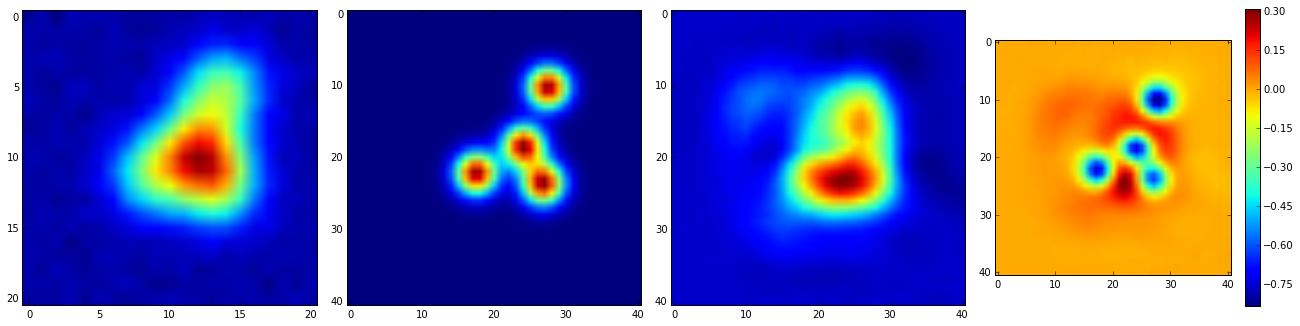

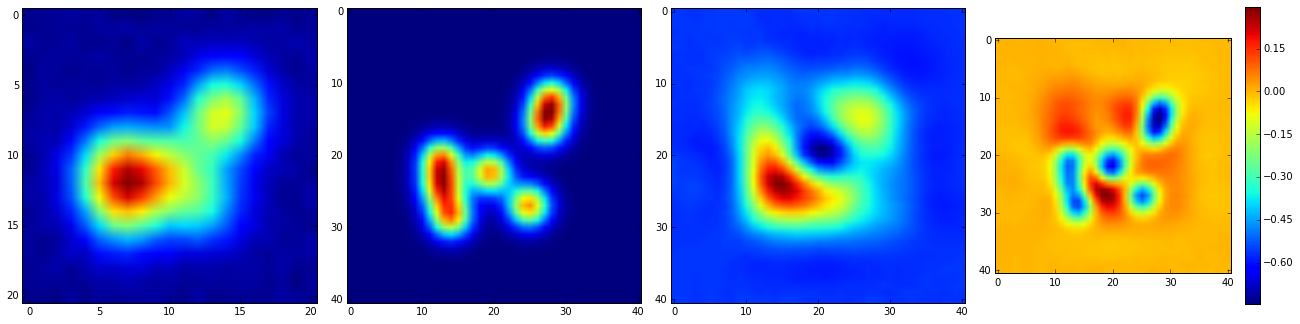

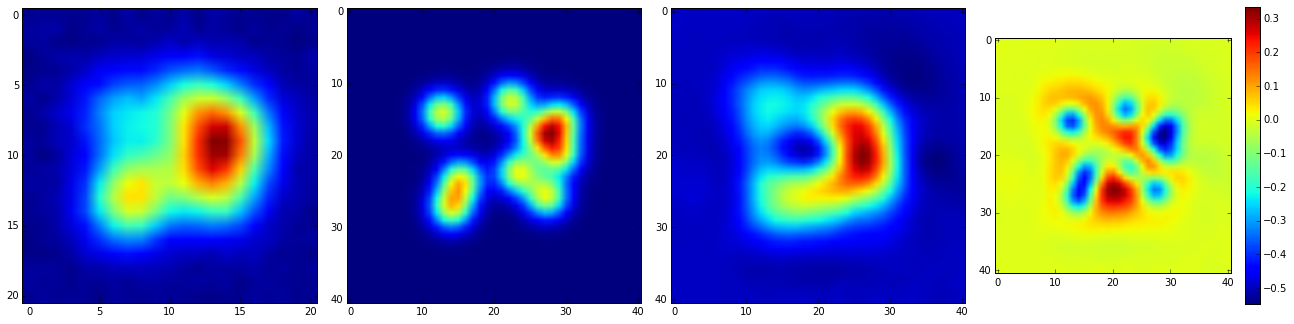

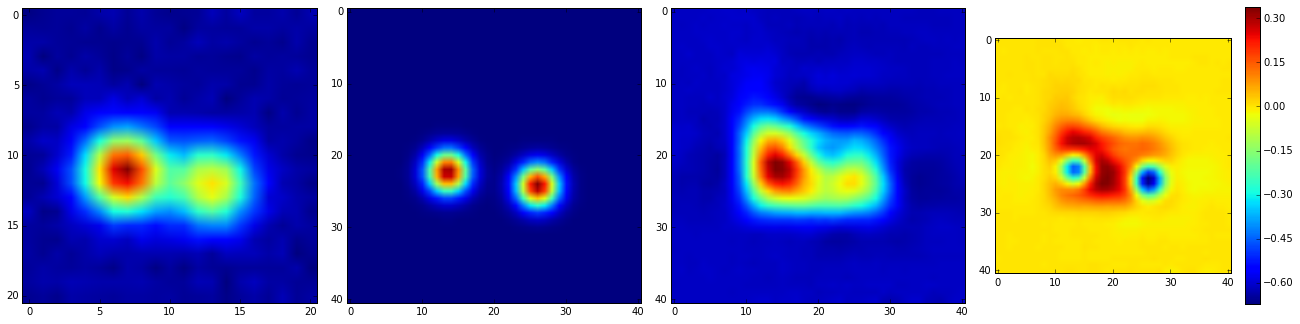

In [83]:
for i in range(10):
    f =figure(figsize(20,5))
    ax = f.add_subplot(1,4,1)
    #print X_test[i,0].shape
    d = 2*nd+1
    #print 
    imshow(X_test[i].sum(axis=0))
    ax = f.add_subplot(1,4,2)
    #print y_test[i].shape
    
    imshow(y_test[i,0])
    ax = f.add_subplot(1,4,3)
    imshow(predicted[i,0])
    ax = f.add_subplot(1,4,4)
    imshow(predicted[i,0]-y_test[i,0])
    colorbar()

21.0